## import package

In [41]:
import requests
import pandas as pd
import numpy as np
import os
import time

import datetime
import time
import json
from  pandas import DataFrame

## 2013~2017 영화데이터 수집

영화진흥위원회 연도별 박스오피스 목록을 파일로 불러들여서 하나의 파일로 합치고
누적 관객수가 10000명 이상인 것만 출력하고 total index를 drop 시킵니다.
영화명으로 중복된 데이터를 삭제 후 movie_df에 저장 했습니다.

In [42]:
dir = os.listdir('./data')
dir.sort()

xlsx_list1 = [file for file in dir if file.endswith('_boxoffice.xlsx') ]

In [43]:
xlsx_list1

['2013_boxoffice.xlsx',
 '2014_boxoffice.xlsx',
 '2015_boxoffice.xlsx',
 '2016_boxoffice.xlsx',
 '2017_boxoffice.xlsx']

In [44]:
for i,data in enumerate(xlsx_list1):
    print(data)

    if i == 0:
        df = pd.read_excel('./data/'+data).head(100)

    
    else:
        small_df = pd.read_excel('./data/'+data).head(100)
        df = pd.concat([df, small_df]).reset_index(drop = True)

2013_boxoffice.xlsx
2014_boxoffice.xlsx
2015_boxoffice.xlsx
2016_boxoffice.xlsx
2017_boxoffice.xlsx


In [45]:
df

,연도별 박스오피스 검색 리스트,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
2,1,7번방의 선물,2013-01-23 00:00:00,91431914670,0.059,12811206,866,166815,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
3,2,설국열차,2013-08-01 00:00:00,67010087500,0.043,9349993,1128,124823,한국,한국,씨제이이앤엠(주)
4,3,관상,2013-09-11 00:00:00,66005427500,0.043,9134581,1240,125073,한국,한국,(주)쇼박스
5,4,아이언맨 3,2013-04-25 00:00:00,70806364000,0.046,9001331,1389,163584,미국,미국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)
6,5,베를린,2013-01-30 00:00:00,52355568637,0.034,7166290,894,111744,한국,한국,씨제이이앤엠(주)
7,6,은밀하게 위대하게,2013-06-05 00:00:00,48700887413,0.031,6959083,1341,117461,한국,한국,(주)쇼박스
8,7,변호인,2013-12-18 00:00:00,40953398000,0.026,5687047,923,55006,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
9,8,숨바꼭질,2013-08-14 00:00:00,39602977500,0.026,5604103,779,88062,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [46]:
df.columns = ['순위', '영화명', '개봉일', '매출액', '매출액점유율', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사']
# df = df.rename(columns={'연도별 박스오피스 검색 리스트':'순위', 'Unnamed: 1':'영화명', 'Unnamed: 2':'개봉일', 'Unnamed: 3': '매출액', 'Unnamed: 4': '매출액 점유율', 'Unnamed: 5': '관객수', 'Unnamed: 6': '스크린수', 'Unnamed: 7': '상영횟수', ';Unnamed: 8':'대표국적', 'Unnamed: 9':'국적', 'Unnamed: 10':'배급사'}, inplace=True)
df


,순위,영화명,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
2,1,7번방의 선물,2013-01-23 00:00:00,91431914670,0.059,12811206,866,166815,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
3,2,설국열차,2013-08-01 00:00:00,67010087500,0.043,9349993,1128,124823,한국,한국,씨제이이앤엠(주)
4,3,관상,2013-09-11 00:00:00,66005427500,0.043,9134581,1240,125073,한국,한국,(주)쇼박스
5,4,아이언맨 3,2013-04-25 00:00:00,70806364000,0.046,9001331,1389,163584,미국,미국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)
6,5,베를린,2013-01-30 00:00:00,52355568637,0.034,7166290,894,111744,한국,한국,씨제이이앤엠(주)
7,6,은밀하게 위대하게,2013-06-05 00:00:00,48700887413,0.031,6959083,1341,117461,한국,한국,(주)쇼박스
8,7,변호인,2013-12-18 00:00:00,40953398000,0.026,5687047,923,55006,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
9,8,숨바꼭질,2013-08-14 00:00:00,39602977500,0.026,5604103,779,88062,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [47]:
df = df.drop(0,0)
df

,순위,영화명,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
1,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
2,1,7번방의 선물,2013-01-23 00:00:00,91431914670,0.059,12811206,866,166815,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
3,2,설국열차,2013-08-01 00:00:00,67010087500,0.043,9349993,1128,124823,한국,한국,씨제이이앤엠(주)
4,3,관상,2013-09-11 00:00:00,66005427500,0.043,9134581,1240,125073,한국,한국,(주)쇼박스
5,4,아이언맨 3,2013-04-25 00:00:00,70806364000,0.046,9001331,1389,163584,미국,미국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)
6,5,베를린,2013-01-30 00:00:00,52355568637,0.034,7166290,894,111744,한국,한국,씨제이이앤엠(주)
7,6,은밀하게 위대하게,2013-06-05 00:00:00,48700887413,0.031,6959083,1341,117461,한국,한국,(주)쇼박스
8,7,변호인,2013-12-18 00:00:00,40953398000,0.026,5687047,923,55006,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
9,8,숨바꼭질,2013-08-14 00:00:00,39602977500,0.026,5604103,779,88062,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
10,9,더 테러 라이브,2013-07-31 00:00:00,39869706381,0.026,5584139,809,93488,한국,한국,롯데쇼핑㈜롯데엔터테인먼트


In [48]:
df = df.drop(1,0)
df

,순위,영화명,개봉일,매출액,매출액점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
2,1,7번방의 선물,2013-01-23 00:00:00,91431914670,0.059,12811206,866,166815,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
3,2,설국열차,2013-08-01 00:00:00,67010087500,0.043,9349993,1128,124823,한국,한국,씨제이이앤엠(주)
4,3,관상,2013-09-11 00:00:00,66005427500,0.043,9134581,1240,125073,한국,한국,(주)쇼박스
5,4,아이언맨 3,2013-04-25 00:00:00,70806364000,0.046,9001331,1389,163584,미국,미국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)
6,5,베를린,2013-01-30 00:00:00,52355568637,0.034,7166290,894,111744,한국,한국,씨제이이앤엠(주)
7,6,은밀하게 위대하게,2013-06-05 00:00:00,48700887413,0.031,6959083,1341,117461,한국,한국,(주)쇼박스
8,7,변호인,2013-12-18 00:00:00,40953398000,0.026,5687047,923,55006,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
9,8,숨바꼭질,2013-08-14 00:00:00,39602977500,0.026,5604103,779,88062,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
10,9,더 테러 라이브,2013-07-31 00:00:00,39869706381,0.026,5584139,809,93488,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
11,10,감시자들,2013-07-03 00:00:00,39380162179,0.025,5508017,949,100309,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [63]:
df.drop(['배급사'], axis=1)

,개봉일,개봉일 특성,관객수,국적,대표국적,매출액,매출액점유율,상영횟수,순위,스크린수,영화명
2,2013-01-23 00:00:00,NaN,12811206,한국,한국,91431914670,0.059,166815,1,866,7번방의 선물
3,2013-08-01 00:00:00,NaN,9349993,한국,한국,67010087500,0.043,124823,2,1128,설국열차
4,2013-09-11 00:00:00,NaN,9134581,한국,한국,66005427500,0.043,125073,3,1240,관상
5,2013-04-25 00:00:00,NaN,9001331,미국,미국,70806364000,0.046,163584,4,1389,아이언맨 3
6,2013-01-30 00:00:00,NaN,7166290,한국,한국,52355568637,0.034,111744,5,894,베를린
7,2013-06-05 00:00:00,NaN,6959083,한국,한국,48700887413,0.031,117461,6,1341,은밀하게 위대하게
8,2013-12-18 00:00:00,NaN,5687047,한국,한국,40953398000,0.026,55006,7,923,변호인
9,2013-08-14 00:00:00,NaN,5604103,한국,한국,39602977500,0.026,88062,8,779,숨바꼭질
10,2013-07-31 00:00:00,NaN,5584139,한국,한국,39869706381,0.026,93488,9,809,더 테러 라이브
11,2013-07-03 00:00:00,NaN,5508017,한국,한국,39380162179,0.025,100309,10,949,감시자들


In [64]:
df.corr()

,개봉일 특성
개봉일 특성,1.0


In [49]:
dir2= os.listdir('./data')
dir2.sort()
xlsx_list2 = [file for file in dir2 if file.startswith('개봉일')]

In [50]:
xlsx_list2

['개봉일특성_2013.xlsx',
 '개봉일특성_2014.xlsx',
 '개봉일특성_2015.xlsx',
 '개봉일특성_2016.xlsx',
 '개봉일특성_2017.xlsx']

In [58]:
for i,data in enumerate(xlsx_list2):
    print(data)

    if i == 0:
        df_openDt = pd.read_excel('./data/'+data)
    
    else:
        small_df = pd.read_excel('./data/'+data)
        df2_openDt = pd.concat([df_openDt, small_df])

개봉일특성_2013.xlsx
개봉일특성_2014.xlsx
개봉일특성_2015.xlsx
개봉일특성_2016.xlsx
개봉일특성_2017.xlsx


In [62]:
df2_openDt

,영화명,개봉일,개봉일 특성
0,7번방의 선물,2013-01-23,4.0
1,설국열차,2013-08-01,2.0
2,관상,2013-09-11,3.0
3,아이언맨 3,2013-04-25,1.0
4,베를린,2013-01-30,4.0
5,은밀하게 위대하게,2013-06-05,2.0
6,변호인,2013-12-18,4.0
7,숨바꼭질,2013-08-14,2.0
8,더 테러 라이브,2013-07-31,2.0
9,감시자들,2013-07-03,2.0


In [56]:
df = df.append(df2_openDt, sort = False)

In [57]:
df

,개봉일,개봉일 특성,관객수,국적,대표국적,매출액,매출액점유율,배급사,상영횟수,순위,스크린수,영화명
2,2013-01-23 00:00:00,NaN,12811206,한국,한국,91431914670,0.059,(주)넥스트엔터테인먼트월드(NEW),166815,1,866,7번방의 선물
3,2013-08-01 00:00:00,NaN,9349993,한국,한국,67010087500,0.043,씨제이이앤엠(주),124823,2,1128,설국열차
4,2013-09-11 00:00:00,NaN,9134581,한국,한국,66005427500,0.043,(주)쇼박스,125073,3,1240,관상
5,2013-04-25 00:00:00,NaN,9001331,미국,미국,70806364000,0.046,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),163584,4,1389,아이언맨 3
6,2013-01-30 00:00:00,NaN,7166290,한국,한국,52355568637,0.034,씨제이이앤엠(주),111744,5,894,베를린
7,2013-06-05 00:00:00,NaN,6959083,한국,한국,48700887413,0.031,(주)쇼박스,117461,6,1341,은밀하게 위대하게
8,2013-12-18 00:00:00,NaN,5687047,한국,한국,40953398000,0.026,(주)넥스트엔터테인먼트월드(NEW),55006,7,923,변호인
9,2013-08-14 00:00:00,NaN,5604103,한국,한국,39602977500,0.026,(주)넥스트엔터테인먼트월드(NEW),88062,8,779,숨바꼭질
10,2013-07-31 00:00:00,NaN,5584139,한국,한국,39869706381,0.026,롯데쇼핑㈜롯데엔터테인먼트,93488,9,809,더 테러 라이브
11,2013-07-03 00:00:00,NaN,5508017,한국,한국,39380162179,0.025,(주)넥스트엔터테인먼트월드(NEW),100309,10,949,감시자들


### 영화 기본 정보 수집

In [87]:
movieNm = df['영화명']
movieNm

2                      베테랑
3                       암살
4         어벤져스: 에이지 오브 울트론
5                     국제시장
6                     내부자들
7                       사도
8           킹스맨 : 시크릿 에이전트
9           미션 임파서블: 로그네이션
10                    연평해전
11                  쥬라기 월드
12                  검은 사제들
13                    히말라야
14                 인사이드 아웃
15                      마션
16        조선명탐정 : 사라진 놉의 딸
17           매드 맥스: 분노의 도로
18                      인턴
19            분노의 질주: 더 세븐
20              터미네이터 제니시스
21                      스물
22                    극비수사
23                     앤트맨
24            스타워즈: 깨어난 포스
25                   빅 히어로
26        메이즈 러너: 스코치 트라이얼
27              탐정 : 더 비기닝
28                    미니언즈
29                     스파이
30                  악의 연대기
31                 강남 1970
              ...         
470                      씽
471                  아빠는 딸
472                    컨택트
473                  47 미터
474              메리와 마녀의 꽃
475                   얼라이드
4

2                      베테랑
3                       암살
4         어벤져스: 에이지 오브 울트론
5                     국제시장
6                     내부자들
7                       사도
8           킹스맨 : 시크릿 에이전트
9           미션 임파서블: 로그네이션
10                    연평해전
11                  쥬라기 월드
12                  검은 사제들
13                    히말라야
14                 인사이드 아웃
15                      마션
16        조선명탐정 : 사라진 놉의 딸
17           매드 맥스: 분노의 도로
18                      인턴
19            분노의 질주: 더 세븐
20              터미네이터 제니시스
21                      스물
22                    극비수사
23                     앤트맨
24            스타워즈: 깨어난 포스
25                   빅 히어로
26        메이즈 러너: 스코치 트라이얼
27              탐정 : 더 비기닝
28                    미니언즈
29                     스파이
30                  악의 연대기
31                 강남 1970
              ...         
470                      씽
471                  아빠는 딸
472                    컨택트
473                  47 미터
474              메리와 마녀의 꽃
475                   얼라이드
4

count                     494
unique                    284
top       2014-12-24 00:00:00
freq                        5
Name: 개봉일, dtype: object

2014-12-24 00:00:00    5
2015-09-24 00:00:00    5
2013-05-16 00:00:00    4
2014-10-02 00:00:00    4
2013-09-12 00:00:00    4
2014-01-09 00:00:00    4
2016-12-07 00:00:00    4
2014-08-13 00:00:00    4
개봉일                    4
2016-09-28 00:00:00    4
2016-08-03 00:00:00    4
2016-02-17 00:00:00    4
2014-09-03 00:00:00    4
2013-12-24 00:00:00    4
2013-12-05 00:00:00    4
2014-12-17 00:00:00    4
2015-01-14 00:00:00    4
2016-12-21 00:00:00    4
2016-04-13 00:00:00    3
2016-05-19 00:00:00    3
2016-01-14 00:00:00    3
2015-05-21 00:00:00    3
2016-06-29 00:00:00    3
2017-03-23 00:00:00    3
2013-01-17 00:00:00    3
2015-03-12 00:00:00    3
2014-02-13 00:00:00    3
2016-01-07 00:00:00    3
2015-12-16 00:00:00    3
2012-12-19 00:00:00    3
                      ..
2017-05-25 00:00:00    1
2013-07-17 00:00:00    1
2014-06-25 00:00:00    1
2016-05-25 00:00:00    1
2017-02-02 00:00:00    1
2016-08-31 00:00:00    1
2014-07-31 00:00:00    1
2015-10-28 00:00:00    1
2013-05-09 00:00:00    1


2014-12-24 00:00:00    0.010121
2015-09-24 00:00:00    0.010121
2013-05-16 00:00:00    0.008097
2014-10-02 00:00:00    0.008097
2013-09-12 00:00:00    0.008097
2014-01-09 00:00:00    0.008097
2016-12-07 00:00:00    0.008097
2014-08-13 00:00:00    0.008097
개봉일                    0.008097
2016-09-28 00:00:00    0.008097
2016-08-03 00:00:00    0.008097
2016-02-17 00:00:00    0.008097
2014-09-03 00:00:00    0.008097
2013-12-24 00:00:00    0.008097
2013-12-05 00:00:00    0.008097
2014-12-17 00:00:00    0.008097
2015-01-14 00:00:00    0.008097
2016-12-21 00:00:00    0.008097
2016-04-13 00:00:00    0.006073
2016-05-19 00:00:00    0.006073
2016-01-14 00:00:00    0.006073
2015-05-21 00:00:00    0.006073
2016-06-29 00:00:00    0.006073
2017-03-23 00:00:00    0.006073
2013-01-17 00:00:00    0.006073
2015-03-12 00:00:00    0.006073
2014-02-13 00:00:00    0.006073
2016-01-07 00:00:00    0.006073
2015-12-16 00:00:00    0.006073
2012-12-19 00:00:00    0.006073
                         ...   
2017-05-

pandas.core.series.Series

2014-12-24    5
2015-09-24    5
2013-05-16    4
2014-10-02    4
2013-09-12    4
Name: 개봉일, dtype: int64

array([datetime.datetime(2015, 8, 5, 0, 0),
       datetime.datetime(2015, 7, 22, 0, 0),
       datetime.datetime(2015, 4, 23, 0, 0),
       datetime.datetime(2014, 12, 17, 0, 0),
       datetime.datetime(2015, 11, 19, 0, 0),
       datetime.datetime(2015, 9, 16, 0, 0),
       datetime.datetime(2015, 2, 11, 0, 0),
       datetime.datetime(2015, 7, 30, 0, 0),
       datetime.datetime(2015, 6, 24, 0, 0),
       datetime.datetime(2015, 6, 11, 0, 0),
       datetime.datetime(2015, 11, 5, 0, 0),
       datetime.datetime(2015, 12, 16, 0, 0),
       datetime.datetime(2015, 7, 9, 0, 0),
       datetime.datetime(2015, 10, 8, 0, 0),
       datetime.datetime(2015, 5, 14, 0, 0),
       datetime.datetime(2015, 9, 24, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2015, 7, 2, 0, 0),
       datetime.datetime(2015, 3, 25, 0, 0),
       datetime.datetime(2015, 6, 18, 0, 0),
       datetime.datetime(2015, 9, 3, 0, 0),
       datetime.datetime(2015, 12, 17, 0, 0),
       date

284

In [76]:
pd.crosstab( df['영화명'],df['개봉일'])

개봉일,2005-11-10 00:00:00,2012-12-19 00:00:00,2012-12-25 00:00:00,2013-01-01 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,2013-01-17 00:00:00,2013-01-23 00:00:00,2013-01-30 00:00:00,2013-02-06 00:00:00,...,2017-11-09 00:00:00,2017-11-15 00:00:00,2017-11-22 00:00:00,2017-11-29 00:00:00,2017-12-07 00:00:00,2017-12-14 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-27 00:00:00,개봉일
영화명,,,,,,,,,,,,,,,,,,,,,
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
007 스펙터,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23 아이덴티티,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300: 제국의 부활,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47 미터,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7번방의 선물,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
가디언즈 오브 갤럭시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가디언즈 오브 갤럭시 VOL. 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가려진 시간,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df['개봉일'].describe()

count                     494
unique                    284
top       2014-12-24 00:00:00
freq                        5
Name: 개봉일, dtype: object

In [82]:
df['개봉일'].value_counts()

2014-12-24 00:00:00    5
2015-09-24 00:00:00    5
2013-05-16 00:00:00    4
2014-10-02 00:00:00    4
2013-09-12 00:00:00    4
2014-01-09 00:00:00    4
2016-12-07 00:00:00    4
2014-08-13 00:00:00    4
개봉일                    4
2016-09-28 00:00:00    4
2016-08-03 00:00:00    4
2016-02-17 00:00:00    4
2014-09-03 00:00:00    4
2013-12-24 00:00:00    4
2013-12-05 00:00:00    4
2014-12-17 00:00:00    4
2015-01-14 00:00:00    4
2016-12-21 00:00:00    4
2016-04-13 00:00:00    3
2016-05-19 00:00:00    3
2016-01-14 00:00:00    3
2015-05-21 00:00:00    3
2016-06-29 00:00:00    3
2017-03-23 00:00:00    3
2013-01-17 00:00:00    3
2015-03-12 00:00:00    3
2014-02-13 00:00:00    3
2016-01-07 00:00:00    3
2015-12-16 00:00:00    3
2012-12-19 00:00:00    3
                      ..
2017-05-25 00:00:00    1
2013-07-17 00:00:00    1
2014-06-25 00:00:00    1
2016-05-25 00:00:00    1
2017-02-02 00:00:00    1
2016-08-31 00:00:00    1
2014-07-31 00:00:00    1
2015-10-28 00:00:00    1
2013-05-09 00:00:00    1


In [83]:
%matplotlib inline

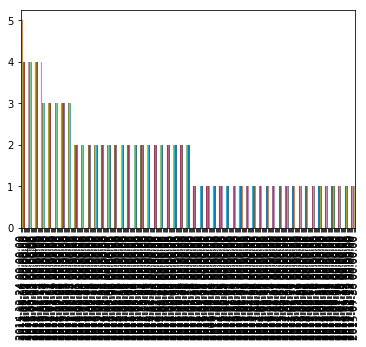

In [86]:
df['개봉일'].value_counts().plot(kind = 'bar')

In [41]:
df_a = pd.DataFrame(openDt)
df_a
# openDt = datetime.datetime.strftime(openDt, '%Y-%m-%d')

,개봉일
2,2015-08-05 00:00:00
3,2015-07-22 00:00:00
4,2015-04-23 00:00:00
5,2014-12-17 00:00:00
6,2015-11-19 00:00:00
7,2015-09-16 00:00:00
8,2015-02-11 00:00:00
9,2015-07-30 00:00:00
10,2015-06-24 00:00:00
11,2015-06-11 00:00:00


In [ ]:
df_a['개봉일']

In [21]:
openDt = datetime.datetime.strptime(openDt, '%Y-%m-%d')

TypeError: strptime() argument 1 must be str, not Series

In [ ]:
class BoxOffice():
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'
   
    def __init__(self, api_key):
        api_key = 'a37309d4545a0c715c2171adbda24a74'
        self.api_key = api_key

    

    def days_between(self, d1, d2):
        d1 = datetime.datetime.strptime( d1 , '%Y%m%d')
        d2 = datetime.datetime.strptime( d2 , '%Y%m%d')
        time_delta = (d2 - d1).days

        daylist = []
        for i in range(time_delta + 1): # range 마지막을 내가 얻고자 하는 날짜까지 늘리기 위해서 이다
                nd = datetime.datetime.strptime(sdate, '%Y%m%d') + datetime.timedelta(i)
                daylist.append(nd.strftime('%Y%m%d'))
        return daylist

#     def get_movies(self, days_between): # 일일 박스오피스 자료 한번 가죠와보까
        
        day_list = days_between(sdate, edate)
    #     target_dt = datetime.now() - timedelta(days = 1000) # 현재날자에서 -1한 날(일)_
        for i in day_list:

            targetDt = str(i) # 날짜를 문자열로 변환해라
            query_url = '{}?key={}&targetDt={}'.format(self.url, self.api_key, targetDt) # 영화진흥흥회의 응답 url이지요

            res = requests.get(query_url)
            text = res.text
            d = json.loads(text)

            for b in d['boxOfficeResult']['dailyBoxOfficeList']:
                       print(b['rank'], b['rankIntern'], b['rankOldAndNew'],
                             b['movieNm'], b['movieCd'], b['audiCnt'], b['audiAcc'], 
                             b['scrCnt'], b['showCnt']  )
            return d

# #         for b in
            with urlopen(query_url) as fin:
                return json.loads(fin.read().decode('utf-8'))

#     def simplify(self, result): # 내가 가져오고 싶은거 가져올거다
#         return [
#             {
#                 '순위' : entry.get('rank'), # 해당일자의 박오 순위다
#                 '영화명' : entry.get('movieNm'),
#                 '상영된 스크린 수' : entry.get('scrnCnt')

#             }
#             for entry in result.get('boxOfficeResult').get('dailyBoxOfficeList') # 응답된 경과 에서 일일 박스오피스 차트를 가져와보까

#         ]
box = BoxOffice(api_key) # 내 Key
sdate = '20130101'
edate = '20180301'
movies = box.da() # 일일 박오 정보 가져와
print(movies) # 정보 출력

In [ ]:
# movie_info_df = make_movie_df(movieNm)

In [ ]:
movie_info_df = 

###영화 상세정보 수집


In [ ]:
movie

In [ ]:
# df["관객수"] = df["관객수"].str.replace(",","")
# df["관객수"] = df["관객수"].astype(int)
# movie_df = df[df["관객수"] > 10000].reset_index(drop=True)
# # movie_df = movie_df.drop(movie_df.index[[3191]])
# movie_df = movie_df.drop_duplicates("영화명").reset_index(drop=True)

### movie_df to csv

In [ ]:
movie_df.to_csv("movie.csv",encoding="utf-8")

## 영화 기본 정보 수집

영화진흥위원회 오픈api를 사용

영화 제목으로 1차적으로 영화코드, 영화제목, 감독, 제작년도, 개봉년도, 상영타입, 제작국가, 대표장르, 배급사 정보 수집

In [ ]:
movieNm = movie_df["영화명"]

In [ ]:
def get_movie_data(movieNm):
    url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json"
    params = {"key":"74ab5419e95d3e66cd760d6f498dc423", "movieNm":movieNm}
    r = requests.get(url, params=params)
    return r.json()

In [ ]:
def make_movie_df(movieNm):
    movie_df = pd.DataFrame(columns = ["movieCd", "movieNm", "director","prdtYear", "openDt", "typeNm", "repNationNm", "repGenreNm", "companyNm"])
    for i in list(movieNm):
        try:
            for data in get_movie_data(i)['movieListResult']['movieList']:
                if len(data["directors"]) >= 2:
                    director = data["directors"][0]["peopleNm"]
                elif len(data["directors"]) == 1:
                    director = data["directors"][0]["peopleNm"]
                if len(data["companys"]) >= 2:
                    companyNm = data["companys"][0]["companyNm"]
                elif len(data["companys"]) == 1:
                    companyNm = data["companys"][0]["companyNm"] 
                movie_df.loc[len(movie_df)] = [
                    data["movieCd"],
                    data["movieNm"],
                    director,
                    data["prdtYear"],
                    data["openDt"],
                    data["typeNm"],
                    data["repNationNm"],
                    data["repGenreNm"],
                    companyNm
                ]
        except:
            print(i)
    return movie_df

In [ ]:
movie_info_df = make_movie_df(movieNm)

In [ ]:
movie_info_df = movie_info_df[~movie_info_df["movieNm"].str.contains("시네마정동")].reset_index(drop=True)
movie_info_df = movie_info_df[movie_info_df["repNationNm"] != "기타"].reset_index(drop=True)
movie_info_df = movie_info_df.drop_duplicates("movieCd").reset_index(drop=True)
movie_info_df = movie_info_df.drop_duplicates("movieNm").reset_index(drop=True)
movie_info_df = movie_info_df[movie_info_df["openDt"] != ""].reset_index(drop=True)

### movie_info_df to csv

In [ ]:
movie_info_df.to_csv("movie_info.csv",encoding="utf-8")

## 영화 상세 정보 수집

영화진흥위원회 오픈api 이용

영화 코드를 이용하여 영화제목, 상영시간, 상영등급, 배우, 배급사 정보 추출

In [ ]:
movieCd = movie_info_df["movieCd"][:3000]

In [ ]:
movieCd1 = movie_info_df["movieCd"][3000::]

In [ ]:
def get_movie_detail(movieCd):
    url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json"
    params = {"key":"d7aeec3963622626f334411333e0121e", "movieCd":movieCd}
    r = requests.get(url, params=params)
    return r.json()

In [ ]:
def make_movie_detail_df(movie_info_df):
    movie_detail_df = pd.DataFrame(columns=["movieCd", 
                                            "movieNm", 
                                            "showTm", 
                                            "watchGradeNm", 
                                            "actor_1",
                                            "actor_2",
                                            "actor_3",
                                            "companyNm"
                                            ])
    for i in list(movieCd1):
        try:
            data = get_movie_detail(i)['movieInfoResult']['movieInfo']
            actor_list = []
            if len(data["audits"]) >= 2:
                watchGradeNm = data["audits"][0]["watchGradeNm"]
            elif len(data["audits"]) == 1:
                watchGradeNm = data["audits"][0]["watchGradeNm"]
            if len(data["companys"]) >= 2:
                companyNm = data["companys"][0]["companyNm"]
            elif len(data["companys"]) == 1:
                companyNm = data["companys"][0]["companyNm"] 
            if len(data["actors"]) >= 3:
                actor_list = [
                    data["actors"][0]["peopleNm"],
                    data["actors"][1]["peopleNm"],
                    data["actors"][2]["peopleNm"]
                ]
            else:
                for i in range(len(data["actors"])):
                    actor_list.append(data["actors"][i]["peopleNm"])
                for i in range(3-len(data["actors"])):
                    actor_list.append("")
            movie_detail_df.loc[len(movie_detail_df)] = [
                data["movieCd"],
                data["movieNm"],
                data["showTm"],
                watchGradeNm,
                *actor_list,
                companyNm
            ]
        except:
             print(i)
    return movie_detail_df

In [ ]:
movie_detail_df = make_movie_detail_df(movieCd)
movie_detail1_df = make_movie_detail_df(movieCd1)
movie_detail = pd.concat([movie_detail_df, movie_detail1_df]).reset_index(drop=True)

In [ ]:
boxoffice_df = movie_info_df.merge(movie_detail, left_on="movieCd", right_on="movieCd")[[
        "movieCd",
        "movieNm_x",
        "director",
        "openDt",
        "prdtYear",
        "repNationNm",
        "repGenreNm",
        "showTm",
        "watchGradeNm",
        "actor_1",
        "actor_2",
        "actor_3",
        "companyNm_y"
    ]]
boxoffice_df = boxoffice_df.rename(columns={"movieNm_x":"movieNm", "companyNm_y":"companyNm"})

### boxoffice_df to csv

In [ ]:
boxoffice_df.to_csv("boxoffice.csv",encoding="utf-8")